In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# First, we should make google colab read the csv file that includes the Cardio Good Fitness dataset. 
cargofit=pd.read_csv('/content/drive/MyDrive/colab_notebooks/CardioGoodFitness.csv')

#1. SANITY CHECKS#

In [ ]:
# The code below gives us the number of rows and columns in the dataset

cargofit.shape

(180, 9)

In [ ]:
# The code below is a more clear and organized way to state the number of columns and rows in a dataset.

print('There are', cargofit.shape[0], 'rows and', cargofit.shape[1], 'columns in Cardio Good Fitness dataset')

There are 180 rows and 9 columns in Cardio Good Fitness dataset


In [ ]:
# The code below allows us to see the first five rows of the dataset, so we can have a brief look at it.

cargofit.head() 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# The code below allows us to see the last five rows of the dataset

cargofit.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


**Conclusion:** As we see from the information above, the number of the last row is 179, not 180, although there are 180 rows/entries in total, because Python starts counting from 0. The number of the first value is 0.

In [ ]:
# The code below allows us to see a general info on the dataset. 
cargofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Conclusion:** The information above tells us that there are 180 entries (or rows) and 9 variables (or columns) in total. 

Each variable has 180 non-null entries, meaning that **none of the variables has a missing value**. This is perfect, because we do not have to handle missing values, which is often a messy job.

Also, we see that the variables Product, Gender, and MaritalStatus are **categorical variables** (because their data type is object or string), whereas the variables Age, Education, Usage, Fitness, Income, and Miles are **numerical variables** (because their data type is integer). There is no float or Boolean type of variable. That is an important piece of information, because whether a variable is numerical or categorical directly affects our decision regarding which plot or statistical analysis to use.

In [ ]:
# The code below provides a more clear output of missing values, showing the number of missing values for each variable

cargofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Conclusion:** We see from the output above that there is no missing value in any of the variables.

In [ ]:
# The code below returns the number of duplicate entries (i.e., the identical rows that have the same value in every column or cell)

cargofit.duplicated().sum() 

0

**Conclusion:** There is no duplicated entry in the dataset.

##1.1 Descriptive Analysis##

In [ ]:
# The code below gives the descriptive statistics for each variable. 
# The command include='all' allows us to see all variables including categorical ones. Otherwise, it would only show numerical variables.
# The letter T transposes the way the descriptive table is shown.

cargofit.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


**Interpreting the Descriptive Table**

The descriptive table shows us the number of values, unique values, most frequently seen value and its frequency, mean, standard deviation, minimum and maximum value, median (which is the 50th percentile) and the 25th and 75th percentiles of each variable. 

Because, Product, Education, and MaritalStatus are categorical variables, the quantitative statistics such as mean or median are NaN (not a number). But we see other statistics such as unique, top, and frequency. For example, Product has 3 unique categories (which will be examined below). The most frequently seen category is TM195, and its frequency is 80. Also, Gender has two categories, the most frequent one being Male (n=104), whereas the number of female is 72, because the total should be 180.

The rest of the variables are numerical variables, so quantitative statistics are calculated for them. Let's interpret the variable age. Based on the table, the average age of all participants is 28.79 (we can round it up to 29 or down to 27 depending on an analyst's choice). The standard deviation from mean is 6.94. Maximum value us 50, meaning that the oldest participants was 50 years old, whereas minimum value is 18, meaning that the youngest participant was 18 years old. Range is 32, because it is the difference between maximum and minimum values.

Furthermore, the median (50th percentile) age is 26, but because age does not generally include outliers, we can use mean rather than using median. If there is not important outlier, mean is better, because it takes into account all the values in a data, so there is less loss of data. On the other hand, median is a better option if there are outliers, because it is less affected by them compared to mean. However, median makes you lose more data, because its calculation ignores most of the values in a dataset. For example, we can use median while looking at income, because income often includes important outliers that can drastically affect the mean, but we will check that later.

Also, the first quartile (25th percentile) of age is 24, meaning that 25% of customers are below the age of 24, whereas the third quartile (75th percentile) of age is 33, meaning that 75% of customers are below the age of 33. 




In [ ]:
# The code below returns the value counts of subsets of each categorical variable in the dataset

cargofit_cat=['Product', 'Gender', 'MaritalStatus'] # The categorical variables are Product, Gender, and MaritalStatus
for column in cargofit_cat:
  print(cargofit[column].value_counts())
  print('-'*50) # This returns fifty dashes separating each variable in the code above

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
--------------------------------------------------
Male      104
Female     76
Name: Gender, dtype: int64
--------------------------------------------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
--------------------------------------------------


In [ ]:
# We can also use the command normalize=True to see the percentage value of subcategories of each categorical variable

for column in cargofit_cat:
  print(cargofit[column].value_counts(normalize=True))
  print('-'*50)

TM195    0.444444
TM498    0.333333
TM798    0.222222
Name: Product, dtype: float64
--------------------------------------------------
Male      0.577778
Female    0.422222
Name: Gender, dtype: float64
--------------------------------------------------
Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64
--------------------------------------------------


**Conclusion:** We see above that we have three different models of treadmills in Cardio Good Fitness, namely TM195, TM498, and TM798. The number of TM195 in the retail store is 80 (44.4%), while it is 60 (33.3%) for TM498 and 40 (22.2%) for TM798. 

There are 104 (57.8%) male customers and 76 (42.2%) female customers of Cardio Good Fitness. 

There are 107 (59.4%) customers who have a partner and 73 (40.6%) customers who are single. 

Data Type is integer/numerical, because it shows the data type of the value counts of subcategories which are numbers, not the variables which are categories or strings. 

In [ ]:
# Lastly, the code below shows the number of unique values in each variable

cargofit.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
cargofit['Income']

0       29562
1       31836
2       30699
3       32973
4       35247
        ...  
175     83416
176     89641
177     90886
178    104581
179     95508
Name: Income, Length: 180, dtype: int64

#2. UNIVARIATE ANALYSIS#

Univariate analysis is all about looking at, describing, and examining only one variable or feature in a dataset. I will use seaborn which allows me to visualize the data and create charts and graphs.



##2.1 Univariate analysis of categorical variables##

Let's first look at categorical variables which are Product, Gender, and MaritalStatus. 

I will use bar graph to compare different subcategories of the categorical variables. 

###2.1.1. Product###

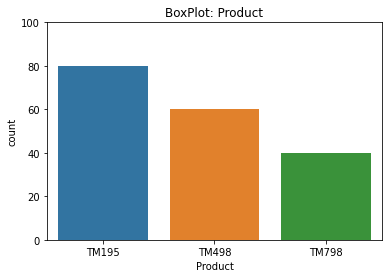

In [ ]:
plt.title('BoxPlot: Product') # This code creates a title on top of the graph
plt.ylim(0,100) # This code determines the minimum and maximum limits in the graph. I used this code to have a bit space on the tallest bar. 

sns.countplot(data=cargofit, x='Product'); # I used semicolon to remove the information appearing above the chart. 
plt.show()

**Conclusion:** The graph shows that there are three products (as I wrote before) and the number of counts is 80 for TM195, 60 for TM498, and 40 for TM798, meaning that Cardio Good Fitness has TM195 the most and TM798 the least. 

###2.1.2. Gender###

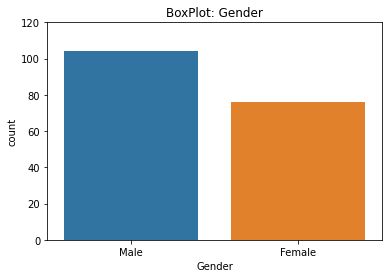

In [ ]:
plt.title('BoxPlot: Gender')
plt.ylim(0,120)
sns.countplot(data=cargofit, x='Gender');
plt.show()

**Conclusion:** The graph shows that the number of male customers for this retail shop is just a bit above 100, whereas the number of female customers is just a bit below 80. 

This is one of the drawbacks of graphs or charts. Although they visualize the data and make it more understandable in an efficient and attractive way, it is often difficult to see the exact values or numbers that belong to a variable. In this example, we see that the number of male customers is a bit above 100, but we do not know the exact value. 

Therefore, we should use other quantitative methods like descriptive statistics or write codes that give the value counts of subsets of each categorical variable in a dataset. I did those analyses above and found that the exact number of male customers was 107. That is why graphs and descriptive statistics/coding should be used together, in a complementary way.

###2.1.3. Marital Status###

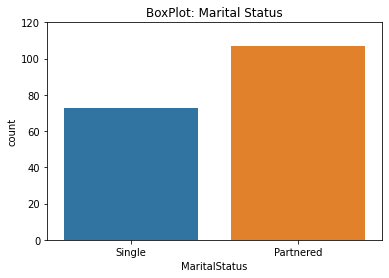

In [ ]:
plt.title('BoxPlot: Marital Status')
plt.ylim(0,120)
sns.countplot(data=cargofit, x='MaritalStatus');
plt.show()

**Conclusion:** The graph shows that the number of customers who have partners in this retail shop is just a bit above 100, whereas the number of customers who are single is just a bit below 70. 

There is the same drawback as the BoxPlot about Gender. From the quantitative analysis done above, I know that the exact number of partnered customers is 107, whereas the exact number of single customers is 73. 

##2.2. Univariate analysis of numerical variables##

The two best plots for univariate analysis of numerical variables are histograms and boxplots. Therefore, I will use them for univariate analysis. 

###2.2.1. Age###

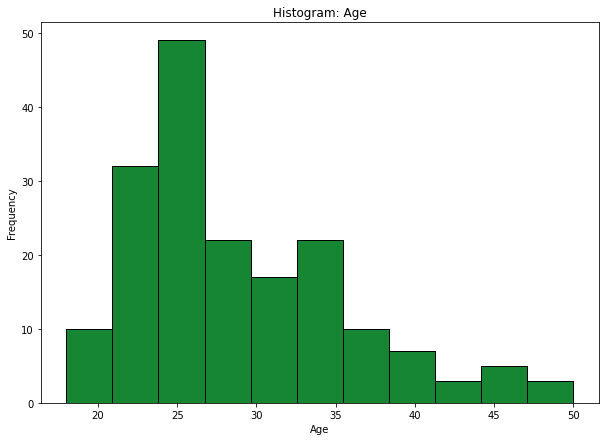

In [ ]:
plt.figure(figsize=(10,7)) # I use this to resize the graph and make it more clear and understandable.
plt.title('Histogram: Age')

sns.histplot(data=cargofit, x='Age'); # The code for creating histograms
plt.xlabel('Age') # plt.xlabel allows you to label the x axis
plt.ylabel('Frequency') # plt.ylabel allows you to label the y axis
sns.histplot(data=cargofit, x='Age', color='green'); # color command allows you to choose a color for the bins

**Changing the number of bins and calculating the optimal number**

Also, we can change the number of bins in a histogram. However, rather than determining a random number of bins, it is better to calculate the optimal number. To find it, we can do the following:

First, calculate the binwidth:

Binwidth=(2*InterquartileRange)/(square root of n)

Then, we can calculate the optimal number of bins:

Bins = Range/Binwidth

In [ ]:
cargofit.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


The interquartile range is the difference between the third quartile and the first quartile. The interquartile range of age= 33-24=9.

The square root of 180 (the number of values) = 13.42

Binwidth = 2*9/13.42 = 1.34

Range = 50-18 = 32

Bins = 32/1.34 = 23.88 = 24

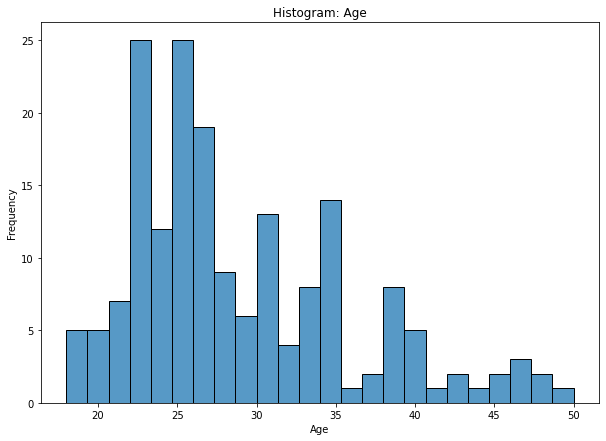

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Histogram: Age')

sns.histplot(data=cargofit, x='Age', bins=24); # bins command allows you to determine the number of bins on a histogram
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Conclusion:** The optimal number of bins created a more detailed and complete histogram of the variable, showing us that the histogram for age was in fact bimodal, meaning that it had two peaks.

**Kernel Density Estimatation**

We can see the distribution of data over a continuous interval which we call KDE. It mainly tells us the probability of a value in a dataset.

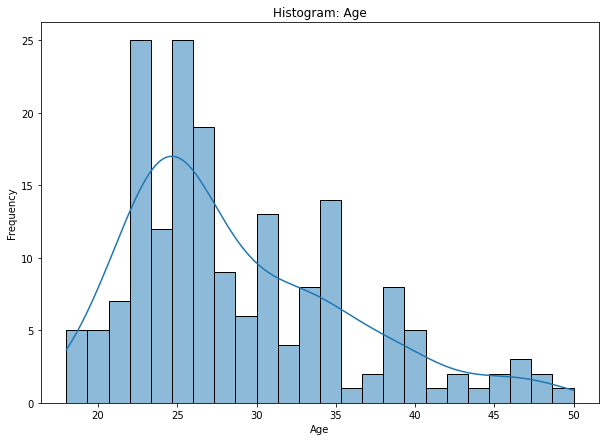

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Histogram: Age')

sns.histplot(data=cargofit, x='Age', kde=True, bins=24); # kde=True shows the kernel density estimation
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Conclusion:** The continuous line that skews towards the right side of the graph shows that age is positively skewed, meaning that most of the values -and the mean- gathered around the lower -or left- side of the graph. It also means that the assumption of normal distribution might be violated, which can affect which analysis you will use for inferential statistics or whether you should transform some values to make it normally distributed, because many robust analyses such as linear regression assumes that the data is normally distributed.

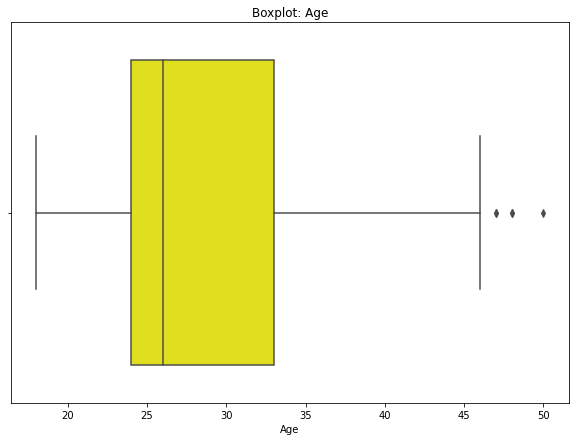

In [ ]:
#We can use Box Plot for a closer look.

plt.figure(figsize=(10,7))
plt.title('Boxplot: Age')
sns.boxplot(data=cargofit, x='Age', color='yellow');

**Conclusion:** It seems that there are **at least** three outliers in this variable. I am using the phrase 'at least' because dots with same values may overlap. Outlier can mean either a value that is higher than the the upper whisker (Q3+1.5xIQR) or a value that is lower than the lower whisker (Q1-1.5xIQR). We will decide how to handle them, after the univariate analysis. The median is closer to the first quartile, and the length between third quartile and the upper whisker is high, meaning that it is positively skewed, which was confirmed in KDE. 

Also, we understand that most customers are between 23 and 34 years old, indicating that customer profile consists of mostly young people. 

###2.2.2. Education###

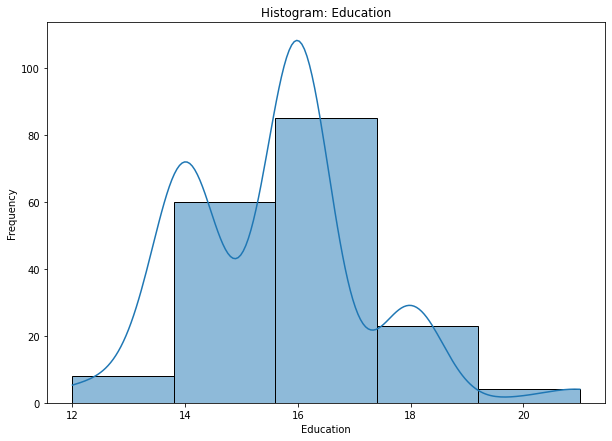

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Histogram: Education')

sns.histplot(data=cargofit, x='Education', kde=True, bins=5)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

**Conclusion:** The variable Education seems bimodal as well -or at least close to being bimodal. 

We can use Box Plot for a closer look.

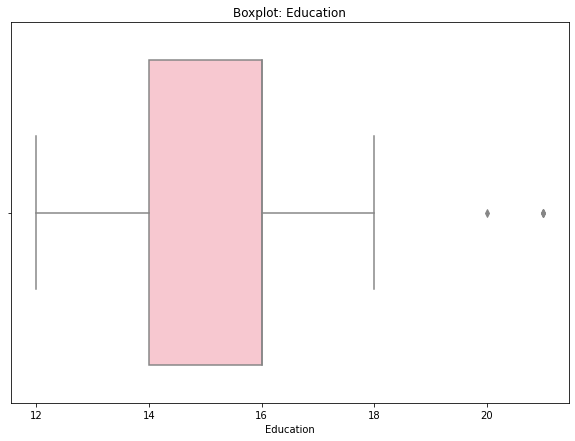

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Boxplot: Education')
plt.xlabel('Education')
sns.boxplot(data=cargofit, x='Education', color='pink');

**Conclusion:** It seems that there are at least two outliers in this variable. Also, we see that there is not a median line between the line of first quartile and that of third quartile. It is because the 50th percentile (median) and the 75th percentile (third quartile) is the same value which is 16. In other words, median is the third quartile (and vice versa) for this variable.

Also, we understand that most customers got an education between 14 and 16 years.

###2.2.3. Usage###



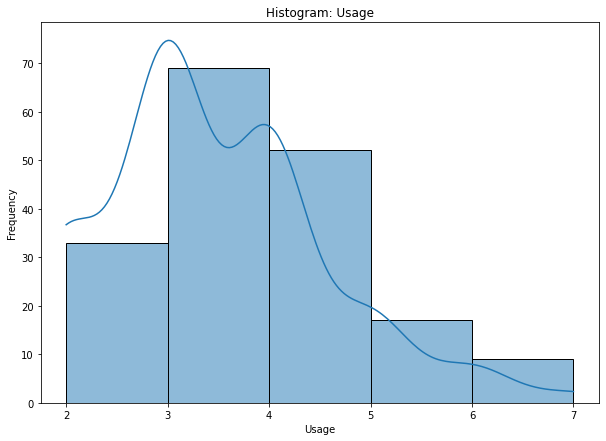

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Histogram: Usage')

sns.histplot(data=cargofit, x='Usage', kde=True, bins=5)
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.show()

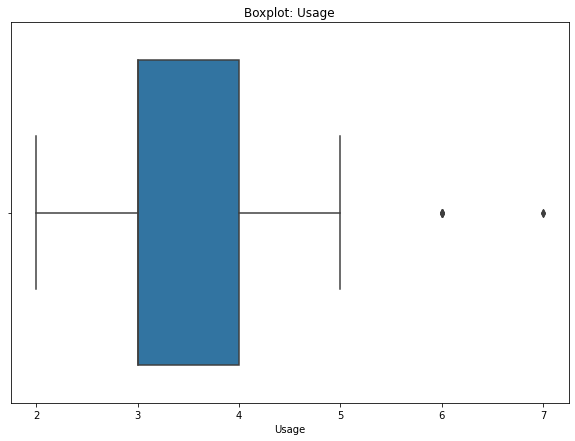

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Boxplot: Usage')
sns.boxplot(data=cargofit, x='Usage');

**Conclusion:** As we can see from the two graphs above, histogram does a better job at showing multiple modes and clusters. Also, it does a better job at revealing the positive skewness, whereas boxplot in this case provides misleading information on skewness of the data. On the other hand, box plot is able to reveal that there are at least two outliers, whereas it is very difficult to understand if there is an outlier by looking at histogram. This time, the median of Usage equals its value of first quartile, so the median line is not clearly shown on the box plot.

Also, we understand that most customers want to use the treadmills 3 or 4 times a week. 

###2.2.4. Fitness###

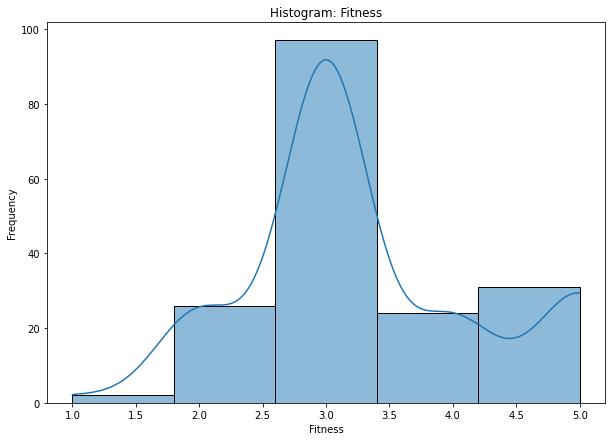

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Histogram: Fitness')

sns.histplot(data=cargofit, x='Fitness', kde=True, bins=5)
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.show()

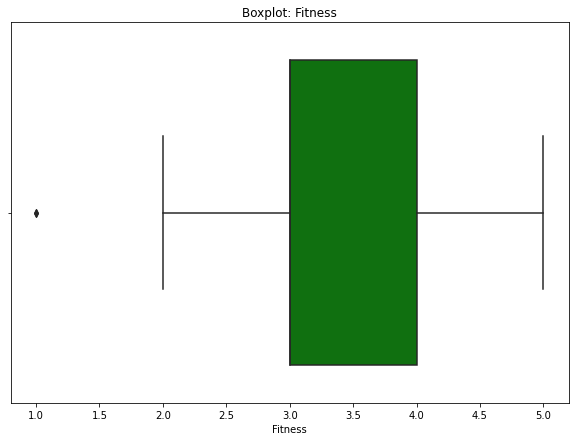

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Boxplot: Fitness')
plt.xlabel('Fitness')
sns.boxplot(data=cargofit, x='Fitness', color='green');

**Conclusion:** Both the KDE in histogram and the equal length of lines to upper whisker and lower whisker in the boxplot show that the distribution of the variable Fitness is most probably normal. Also, boxplot shows that it has at least one variable at the lower end of the data. 

On average, people rated their fitness level as moderately fit. However, because that is a self-report about one's fitness, it may be biased, because people generally do not perceive themselves as very unfit or very fit. Self-ratings about sensitive subjects such as one's sense of physical fitness tend to gather around the middle (or safe) option. However, to confirm my hypothesis, further literature review is needed. If that is confirmed, then we may want to remove the moderate option and force people to lean towards one side or another. 

###2.2.5. Income###

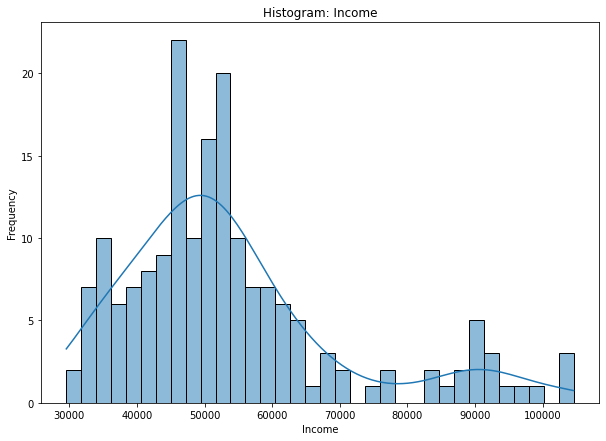

In [ ]:
plt.figure(figsize=(10,7))

plt.title('Histogram: Income')


sns.histplot(data=cargofit, x='Income', kde=True, bins=34) # I calculated the optimal number of bins which is 34.
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

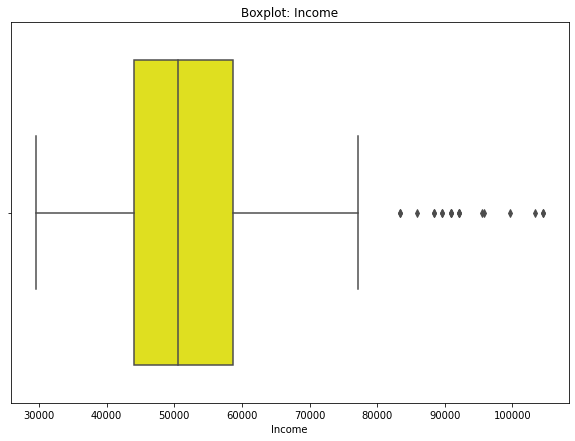

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Boxplot: Income')
plt.xlabel('Income')
sns.boxplot(data=cargofit, x='Income', color='yellow');

**Conclusion:** Histogram reveals that the variable Income is positively skewed, meaning that most of the values gathered around the left side of the graph. It also means that most people earn between 40000 and 60000. 

Boxplot reveals that there are several (or many?) outliers at the right side of the graph, meaning that some customers have very high incomes compared to average. It is common to have outliers in the variable income in nearly all datasets, because there are always some people who earn a lot in a population or sample.

###2.2.6. Miles###

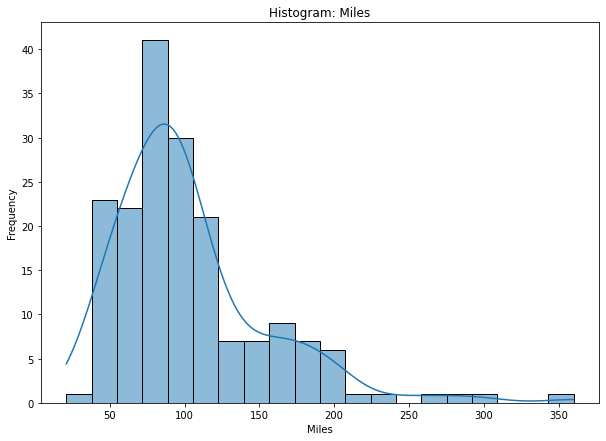

In [ ]:
plt.figure(figsize=(10,7))

plt.title('Histogram: Miles')


sns.histplot(data=cargofit, x='Miles', kde=True)
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

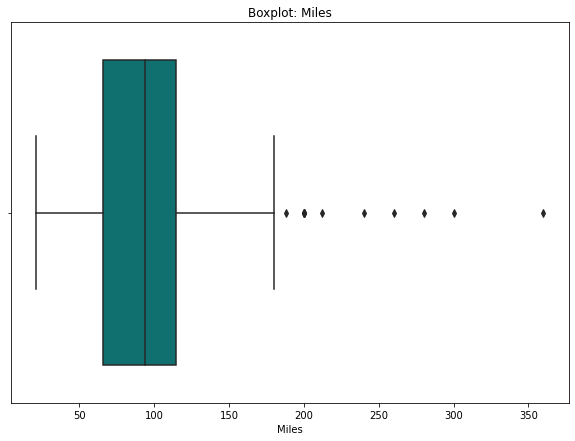

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Boxplot: Miles')
plt.xlabel('Miles')
sns.boxplot(data=cargofit, x='Miles', color='teal');

**Conclusion:** Histogram reveals that the variable Miles is positively skewed, meaning that most of the values gathered around the left side of the graph. It also means that most customers expect to run around 90 miles (however, there is no info if that is per week or month or something else).

Boxplot reveals that there are several (or many?) outliers at the right side of the graph, meaning that some customers expect that they will run significantly more than the average customer. 

#3. OUTLIER DETECTION AND TREATMENT#

The main decision in outlier treatment is about whether we should drop the outlier or keep it. To decide that, we should first look at if the outlier is meaningful or just an extreme value entered incorrectly. Also, a data scientist should have some knowledge of the domain or area that the dataset is about to make a good decision.

As a PhD candidate in psychology and quantitative methods, I am mostly against dropping a meaningful outlier just because it is an extreme value. If a value is meaningful, it should not be dropped unless it distorts the dataset to a great extent or makes one unable to conduct analysis. Even in that case, why one dropped that extreme value should be justified strongly and explained clearly. 

Also, I want to do outlier detection and treatment, before conducting multivariate analysis, because an outlier can affect the analysis and the relationship between variables, and if I decide to remove that outlier, I want to do that now. 

Although the boxplots above revealed the outliers in each numerical variable, let's take a more holistic look at them. 

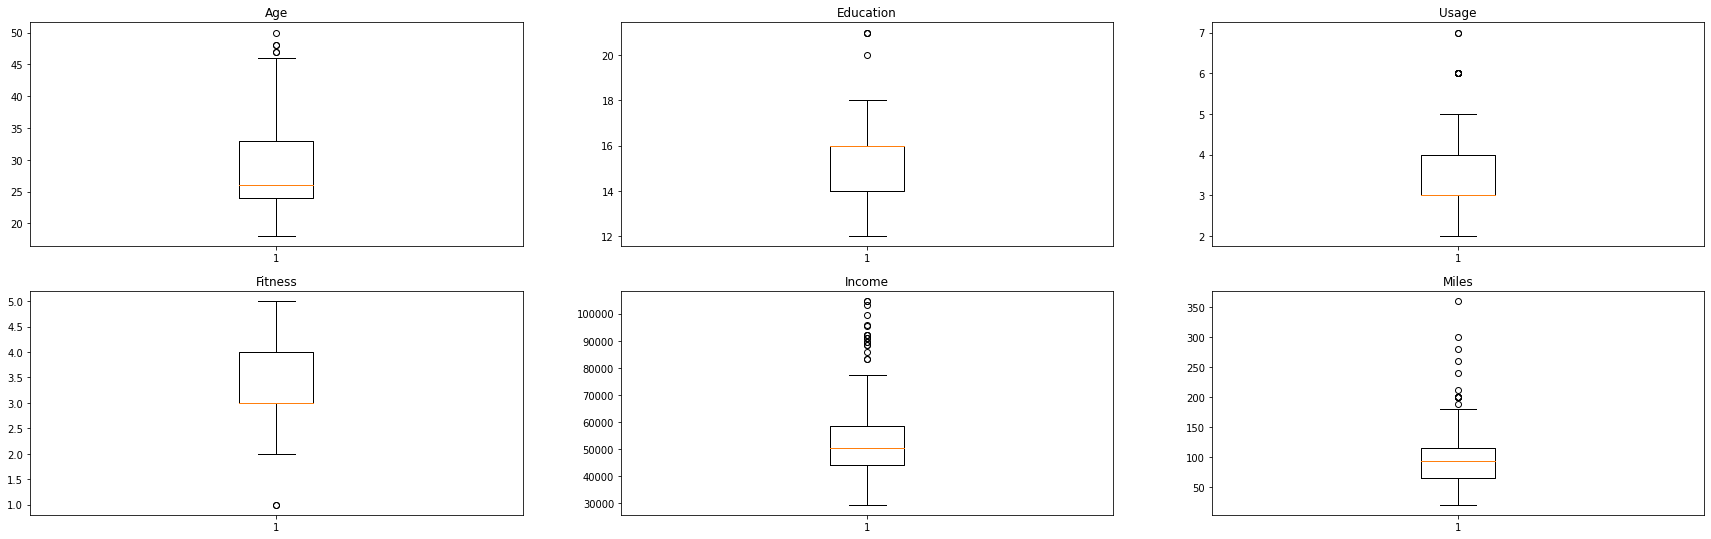

In [ ]:
# The code below will provide the boxplots for each numerical variable in the same huge graph

cargofit_boxplots=['Age','Education','Usage','Fitness','Income','Miles']
plt.figure(figsize=(30,14))
for i, variable in enumerate(cargofit_boxplots): # Enumerate assigns a counter to count the variables in the list
  plt.subplot(3,3,i+1)  # This means that there will be 3 boxplots in each row
  plt.boxplot(cargofit[variable], whis=1.5) # whis=1.5 means that our cut-off value to calculate an outlier is 1.5. 
  plt.title(variable)

plt.show()

Also, we can look at number of outliers and the percentage of outliers in each variable. To do that, we should first write a code that will calculate the 25th and 75th percentiles the exact values at lower and upper whiskers, because the code that will find the number and percentage of outliers requires those exact values.

In [ ]:
# The code below returns the 25th and 75th values and then, it gives the exact values at lower and upper whiskers

Q1=cargofit[cargofit_boxplots].quantile(0.25)
Q3=cargofit[cargofit_boxplots].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR



In [ ]:
# Calculating the number of outliers in each variable

((cargofit[cargofit_boxplots]<lower)|(cargofit[cargofit_boxplots]>upper)).sum()

Age           5
Education     4
Usage         9
Fitness       2
Income       19
Miles        13
dtype: int64

**Conclusion:** The output above confirm my suspicion that the dots representing the outliers in boxplots overlapped. For example, although there are only two dots that represent the outliers in Education, the output above shows that there are in fact four outliers in the same variable.

In [ ]:
# Calculating the percentage of outliers in each variable

((cargofit[cargofit_boxplots]<lower)|(cargofit[cargofit_boxplots]>upper)).sum()/cargofit.shape[0]*100

Age           2.777778
Education     2.222222
Usage         5.000000
Fitness       1.111111
Income       10.555556
Miles         7.222222
dtype: float64

We see that 10.5% of the values in Income are outliers, whereas 1.11% of the values in Fitness are outliers. I will not write the percentages of outliers in each variable. 

Whether a value is an outlier also depends on the cut-off value one chooses while calculating the exact value at lower and upper whiskers. If you choose it 2.5, not 1.5, there will be less number of outliers. Let's try it.

In [ ]:
Q1_new=cargofit[cargofit_boxplots].quantile(0.25)
Q3_new=cargofit[cargofit_boxplots].quantile(0.75)
IQR_new=Q3_new-Q1_new
lower_new=Q1_new-2.5*IQR_new
upper_new=Q3_new+2.5*IQR_new

In [ ]:
((cargofit[cargofit_boxplots]<lower_new)|(cargofit[cargofit_boxplots]>upper_new)).sum()/cargofit.shape[0]*100

Age          0.000000
Education    0.000000
Usage        1.111111
Fitness      0.000000
Income       3.333333
Miles        2.777778
dtype: float64

As we see, the new calculation with the new cut-off values finds that only 3.33% of the values in Income are outliers, whereas 0% of the values in Fitness are outliers. However, it does not provide more accurate and precise results, because although it says that Fitness has no outlier, we know from the boxplots that it has one outlier. Therefore, I will stick with the original cut-off value.

##3.1. Decision for outliers##

In [ ]:
cargofit.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


Now, let's decide whether we should drop the outliers or not one by one.

**Age:** The maximum value of age in the dataset is 50. It is definitely not a meaningless extreme value. It is very realistic, so we keep it and the other outliers lower than that. 

**Education:** The maximum value of the years of education that a customer got is 21. It is a realistic value, not meaningless, because the year of education I got is 28. 

**Usage:** The maximum value is 7, meaning that one of the customers expects to use a treadmill everyday in a week. As a person who goes to gym, using a treadmill seven days a week is difficult, but not unrealistic or meaningless. I have just checked the dataset and saw that the customer who expected to use the treadmills everyday also rated himself very fit, so we can assume that he can truly use the treadmills everday.

**Fitness:** The maximum value is 5, meaning that some customers rated themselves very fit. It is totally meaningful. 

**Income:** Income is one of the variables that can usually have meaningful outliers, but at the same time, some of the variables in Income may be unrealistic, because it is easy to enter a lot of numbers incorrectly. The maximum value is 104581. It can be an extreme value or not based on the country one lives in. Although the country name is not given in the description of the dataset, I assume that it is United States, because it uses Miles as a unit of measurement, and there are only three countries that officially use the imperial measures. They are the United States, Myanmar, and Liberia. Therefore, it is reasonable to assume that the dataset is from the United States, and earning $104581 in the United States is far from being unrealistic.

**Miles:** There is no information on the timeline regarding the miles that a person expects to run. Is it per week or month? I assume that it is per month, because running 103 miles in a week is nearly impossible, and that is the mean value, not even the outlier. However, even when I assume that it is per month, Miles above 200 is not realistic, because even the marathon runners on average run 200 miles a month.

**DECISION:** I will keep the outliers in all numerical variables except Miles. I will cap/clip the minimum and maximum value of Miles to the upper and lower whisker value of the boxplot.


In [ ]:
def treat_outliers(df, col): # I define a function that will first calculate the lower and upper whisker values and then assign the minimum and maximum values of Miles to its lower and upper whisker values, respectively.
  Q1_cap=df[col].quantile(0.25)

  Q3_cap=df[col].quantile(0.75)

  IQR_cap=Q3_cap-Q1_cap

  lower_cap=Q1_cap-1.5*IQR_cap

  upper_cap=Q3_cap+1.5*IQR_cap
  df[col]=np.clip(df[col], lower_cap, upper_cap) 
  return df

df[col]=np.clip(df[col], lower_cap, upper_cap) --> The clip function allows me the assign all the values of a variable that meets the condition to a specific value. Here, all the values lower than lower whisker or higher than upper whisker will be assigned to the value of lower whisker or the value of higher whisker, respectively.

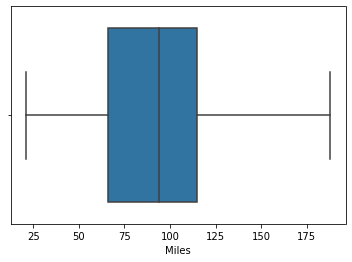

In [ ]:
cargofit=treat_outliers(cargofit, 'Miles')
sns.boxplot(data=cargofit, x='Miles')
plt.show()

In [ ]:
((cargofit[cargofit_boxplots]<lower)|(cargofit[cargofit_boxplots]>upper)).sum()

Age           5
Education     4
Usage         9
Fitness       2
Income       19
Miles         0
dtype: int64

**Conclusion:** There is no outlier in Miles anymore, because I replaced all outliers with either the exact value at upper whisker (there was no outlier below the lower whisker).

#4. MULTIVARIATE ANALYSIS#

##4.1. Relationships between numerical variables##

I do not have to look at the relationship between every two variables. I should examine the relationship between variables that are significantly correlated. However, because we have not learn how to find statistical significance in Python, I will just use the strength of correlation between two variables to decide whether to look at the relationship between them.

First, I will create a correlation matrix which includes the direction and strength of correlation between every variable. The correlation matrix below is also called heatmap which is a geographical representation of data as a color-coded matrix

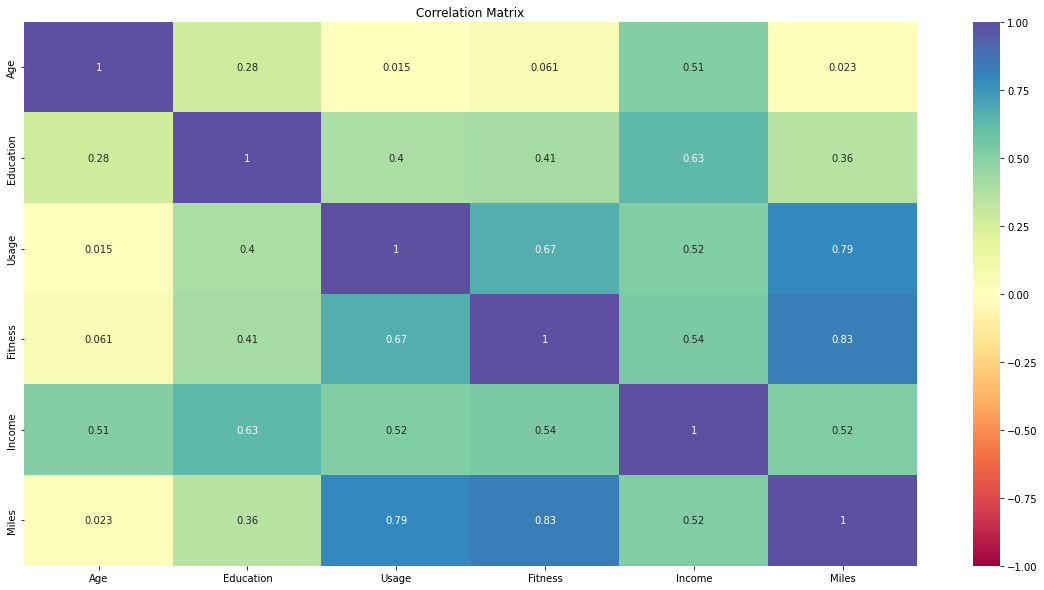

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix')
sns.heatmap(cargofit.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

# data.corr() gives the correlation of the data (the strength and the direction of the correlation)
# annot=True writes the value of each correlation inside the cells of the correlation matrix
# cmap adjusts the color of the heatmap
# vmin=-1, vmax=1 makes your graph between -1 and 1, because a correlation value cannot be less than -1 and more than 1. 


**Conclusion:** The correlation matrix above reveals that **none of the variables are negatively correlated**, because there is no value less than 0. 

There is a **low positive correlation** between a customer's age and the years of education he or she got, which makes sense.

There is a **moderate positive correlation** between a customer's age and the customer's income, which makes sense, because older age means more experienced and senior employee, and that means higher payment.

There is a **high positive correlation** between the days that a customer expects to use treadmills in a week (Usage) and the customer's self-report of how he or she fit is as well as the miles that the customer expects to run (Miles). It makes sense, because a person who uses a treadmill more frequently can see oneself fitter compared to others and run more miles. 

There is a **moderate positive correlation** between a customer's years of education and the customer's usage, fitness, and miles, and it has a high correlation with income. The positive correlation between education and income is a well-known and empricially supported fact. On the other hand, the moderate correlation of education with usage, fitness, and miles is really an interesting finding. I assume that those correlations are also statistically significant, because moderate correlations are generally found to be significant in social sciences literature. Further review of literature is needed to make sense of those correlations.

Income is **moderately positively correlated** with usage, miles and fitness. It makes sense because a person with higher income can find more time, motivation, and resources to exercise (usage and miles) and be healthy (self-rating of fitness).

Let's look at the relationship between some of the numerical variables by using plots.

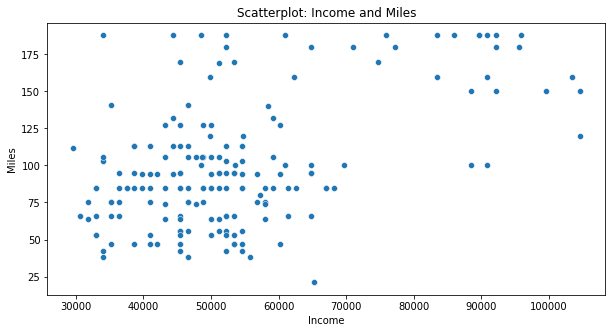

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Scatterplot: Income and Miles')
sns.scatterplot(data=cargofit, x='Income', y='Miles');

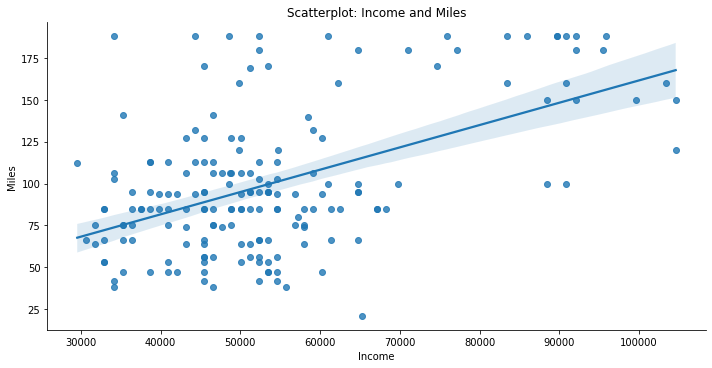

In [ ]:

sns.lmplot(data=cargofit, x='Income', y='Miles', height=5, aspect=2)
plt.title('Scatterplot: Income and Miles');

**Conclusion:** While it is sometimes difficult to see a potential correlation between two variables on a scatterplot, lmplot makes it easier by showing the line that best fits the model. We can see that there is a positive correlation between Miles and Income, but it is still difficult to understand the strength of it. We can write a code to look at the correlation between two variables (the matrix shows that as well). 

Moreover, the blue shaded area around the best fit line shows the confidence interval, the interval in which we confidently assume the true value falls in.The narrower the interval, the higher chance that the value represented by the best fit line is the true value, hence higher chance of statistical significance.

In [ ]:
cargofit[['Income', 'Miles']].corr() # This code gives the correlation between Income and Miles

,Income,Miles
Income,1.000000,0.522142
Miles,0.522142,1.000000


**Conclusion:** We see that there is a moderately positive correlation between Income and Miles.

I can also use jointplot to see the relationship between two numerical variables. Joint plot mainly combines histogram and scatterplot. Therefore, it shows both the relationship between two variables and the frequency distribution of each variable.

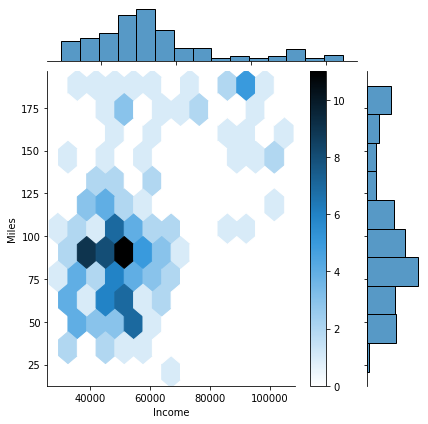

In [ ]:
sns.jointplot(data=cargofit, x='Income', y='Miles', kind='hex') # kind=hex command creates hexagonal shapes rather than scatterplot dots to show the relationship
plt.colorbar(); # This creates a colorbar

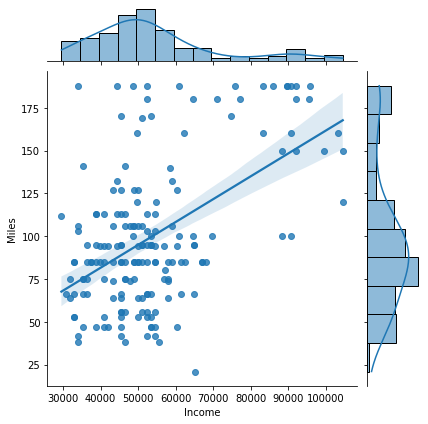

In [ ]:
sns.jointplot(data=cargofit, x='Income', y='Miles', kind='reg'); # kind='reg' allows us to see the best fit line and the confidence intervals

Moreover, I can use pairplot to see the relationship between two numerical variables for each pair of columns in a dataset. It is like a scatterplot matrix. 

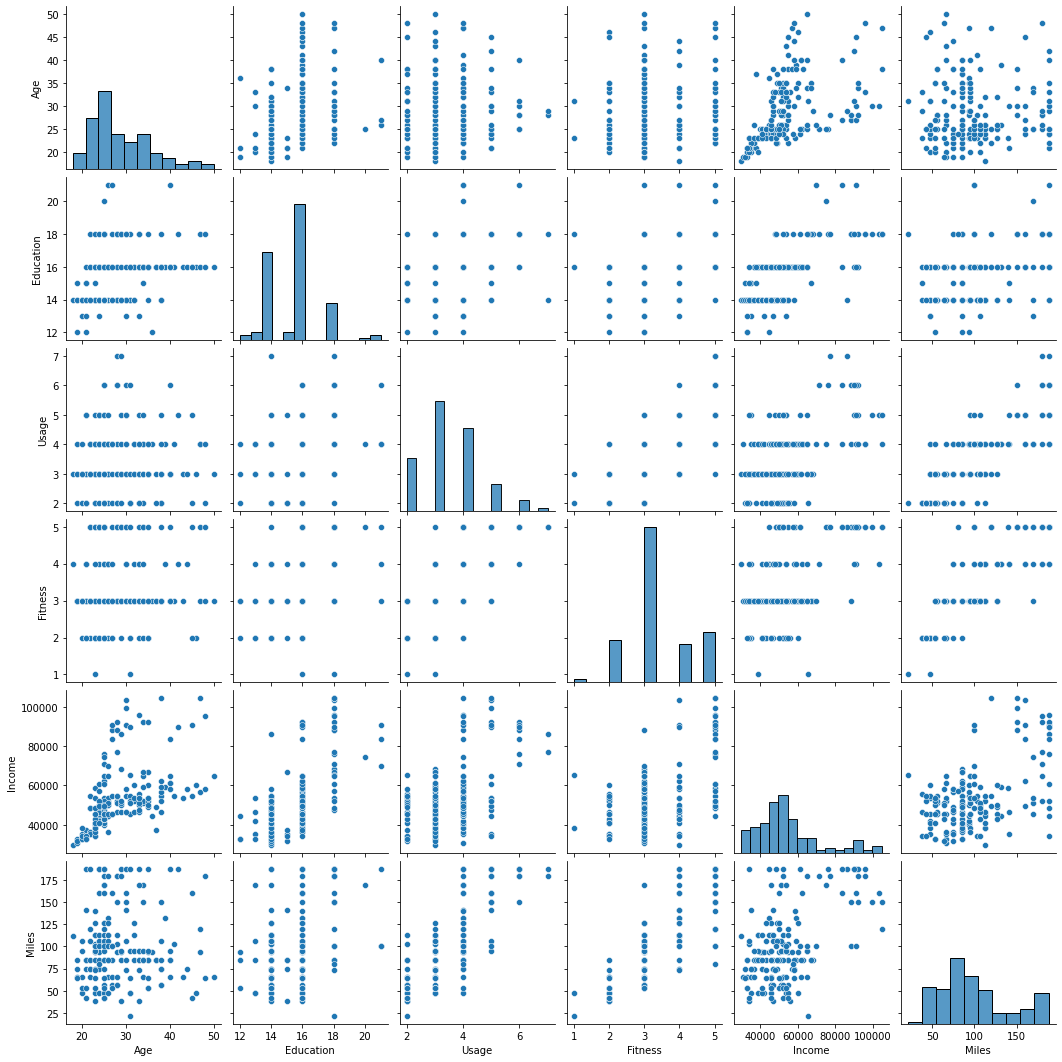

In [ ]:
# The code below creates a pairplot for each variable in the list

sns.pairplot(data=cargofit[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]);

**IMPORTANT:** We see from the scatterplots above that the dots on some of them (e.g., the scatterplot showing the relation between Usage and Fitness) have weird patterns, not like the scatterplot showing the relation between Miles and Income. This is a very important point. It is because Income and Miles are real numerical values that represent real numbers that have a starting point of zero. We call them nominal or ratio variables. On the other hand, the numerical values in Fitness and Usage represent strings, not real numbers. For example, the numerical value of 1 in Fitness represent the string 'Not Fit'. We call these types of variables as ordinal variables. They are mostly used in surveys where numbers represent strings such as Disagree, Agree etc.

Why is that important? It is important because regression analysis assumes normal distribution of data, while a variable with ordinal variables cannot have a normal distribution, because it has not real mean value. Therefore, regression works only when your variables are real numerical variables. Although regression is widely used while analyzing scales and surveys with non-real numerical values, whether it is methodologically correct or not is still a hot debate. 


##4.2. Relationships between numerical and categorical variables##

A more meaningful multivariate analysis is done between numerical and categorical variables in which we examine a numerical variable in the context of subsets of a categorical variable.

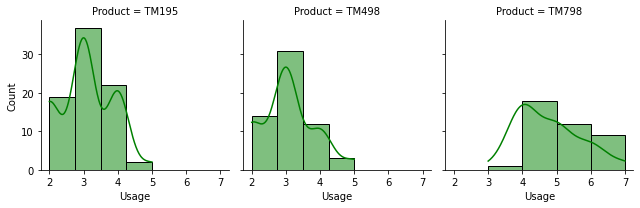

In [ ]:
# The code below creates subplots that will give a histogram of Usage for each type of Product. 
grid=sns.FacetGrid(cargofit, col='Product')
grid.map(sns.histplot, 'Usage', bins=4, kde=True, color='green');


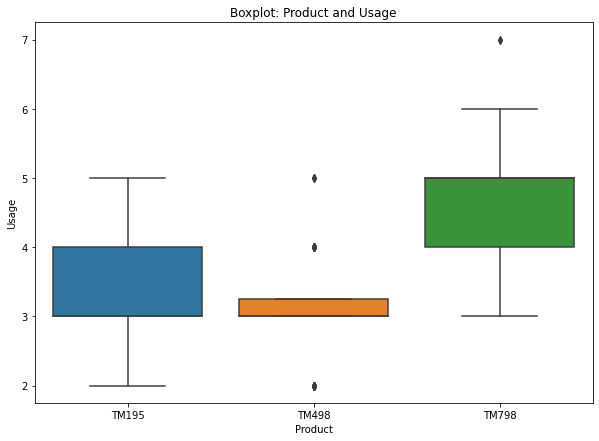

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Boxplot: Product and Usage')
sns.boxplot(data=cargofit, x='Product', y='Usage');

**Interpretation**: As we can see from the graphs above, TM798 is mostly preferred by those who expects to use a treadmill more frequently, whereas TM195 and TM498 are preferred by those who expects to use it less frequently in a week.

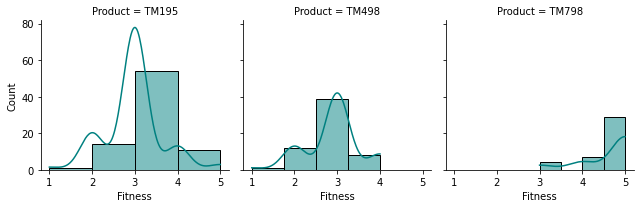

In [ ]:
grid=sns.FacetGrid(cargofit, col='Product')
grid.map(sns.histplot, 'Fitness', bins=4, kde=True, color='teal');

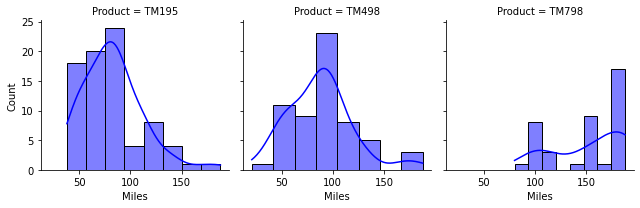

In [ ]:
grid=sns.FacetGrid(cargofit, col='Product')
grid.map(sns.histplot, 'Miles', bins=8, kde=True, color='blue');

**Interpretation**: As we can see from the graphs above, TM798 is mostly preferred by those who expects to run more miles and perceives themselves fitter, whereas TM195 and TM498 are preferred by those who expects to run less miles and perceives themselves as less fit.

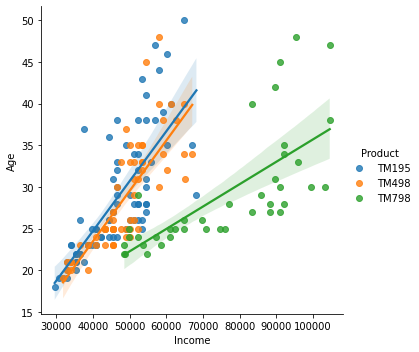

In [ ]:
sns.lmplot(data=cargofit, x='Income', y='Age', hue='Product'); # hue='Product' command allows me to see a relation between two numerical variables in the context of subsets of a categorical variable

**Interpretation:** The lmplot with confidence intervals reveals that customers with higher income prefers to use TM798, whereas customers with lower income (compared to the other group) prefers to use TM195 and TM498. There is not much difference between different age groups in the context of preference. 

I can also use violinplot to visualize the distribution of a numerical value for several categorical groups

Violin plot is similar to boxplot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.

It combines boxplot (rotated) and density plot (kde)

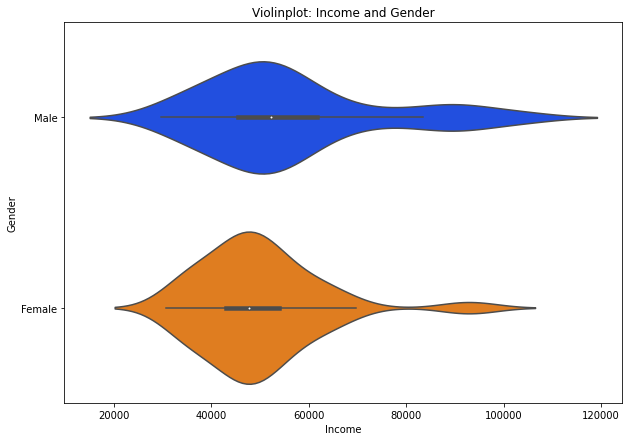

In [ ]:
# The code below creates a violin plot
plt.figure(figsize=(10,7))
plt.title('Violinplot: Income and Gender')
sns.violinplot(data=cargofit, x='Income', y='Gender', palette='bright'); # palette=bright command makes your violin plot have a brighter color

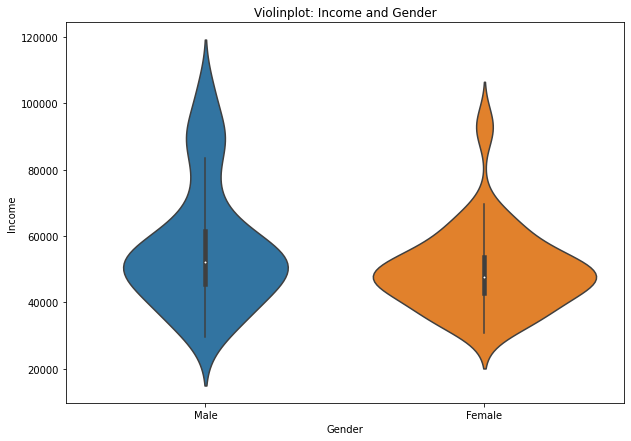

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Violinplot: Income and Gender')
sns.violinplot(data=cargofit, x='Gender', y='Income', orient='v'); # We can get a vertical violinplot by setting orient parameter to v and assigning a numeric value to y-axis;

**Interpretation:** The violinplots above reveal that there is not much difference between male and female customers in terms of income. The income of male customers tend to a bit more positive skewed, whereas it is more normally distributed for female customers. Median income value for females is slightly lower than that for males. However, I do not think that it is a significant difference.

##4.3. Relationships between categorical variables##

We mostly use bar charts to examine the relationship between two or more categorical variables.

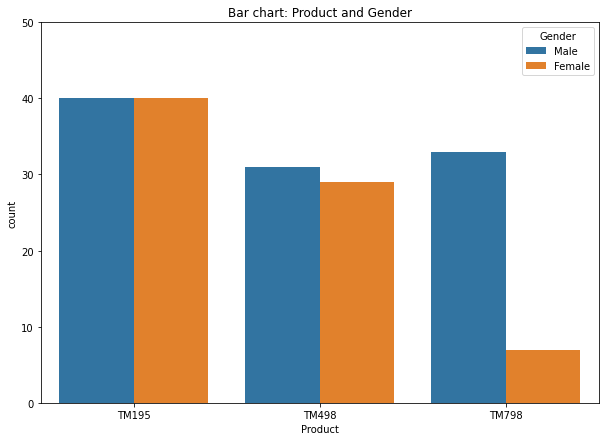

In [ ]:
# The code below creates a bar chart for the variables listed

plt.figure(figsize=(10,7))
plt.title('Bar chart: Product and Gender')
sns.countplot(data=cargofit, x='Product', hue='Gender')
plt.ylim(0,50);


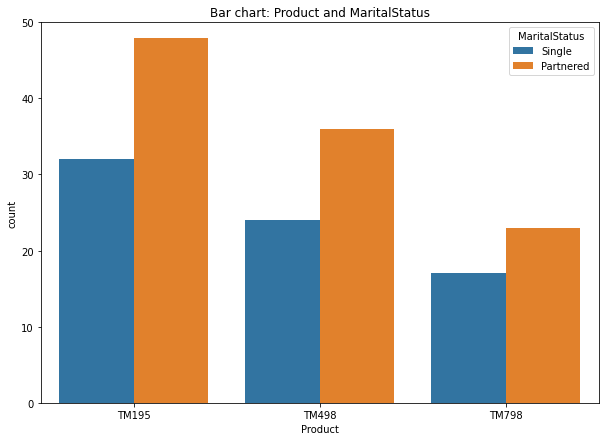

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Bar chart: Product and MaritalStatus')
sns.countplot(data=cargofit, x='Product', hue='MaritalStatus')
plt.ylim(0,50);


**Interpretation:** As we see from the bar charts above, there is not a significant difference between males and females in terms of preferring TM195 or TM498. On the other hand, males prefer TM798 significanlty more compared to females. 

Also, customers who have a partner prefers to use each of the three products significantly more compared to single customers. However, that difference may result from the fact that couples responded to the questions about which product they prefer and increased the value count, because they are 2 people, whereas single customers are only 1 person. 

#5. CONCLUSIONS AND RECOMMENDATIONS#

**Findings**: The most important finding from multivariate analyses is that TM798 are mostly preferred by the people who seems passionate and serious about using treadmills for running, jogging, power walking etc., because the customers who preferred TM798 expected to run significanlty more miles and use the treadmills most of the week and mostly rated themselves as fit or very fit. 

On the other hand, TM195 and TM498 are mostly preferred by the people who are more causal about using them for running or similar exercises, because the customers who preferred them also expected to run less and use treadmills less frequently in a week and mostly rated themselves as less fit compared to the first group who prefers to use TM798.

I do not think that income was an important issue that would discourage people  with at least a moderate income from buying TM798, because the plots showed that some people with moderate income were still able to buy it. The main reason must be being so passionate or serious about running that you can spend your money for buying the newest and probably the most high-tech treadmill, even if you have moderate income. For example, I am a part-time graduate assistant and full-time student, so my annual income is very low, but I still managed to get one of the best drip coffee makers and grinders, because I am passionate about coffee.

**Recommendations:** Why am I emphasizing passion and ambition at one hand and being causal at the other? It is because my recommendation will be about the advertisement of those products. I recommend Cardio Good Fitness to create advertisements for each product based on the customer profile who prefers them. Because TM798 is preferred mostly by those passionate about running, the advertisement should emphasize achievement, motivation, ambition and such feelings. On the other hand, because TM195 and TM498 are mostly preferred by the people who are more causal about running or exercising, the advertisement for them should emphasize healthy lifestyle, exercising as a family activity and such. 

One last thing is that there is a significant gender difference in TM798, males preferring it significantly more than females. Why is the such huge difference? I do not think that females are way less passionate about running or similar exercises. I recommend that advertisements or promotions about TM798 can try to target female customers as well. Also, the number of female employees can be increased, so female customers can feel like they are in a more familiar and friendly environment and represented in that store. 